## We have 3 datasets in the cell_data folder involving cell phone usage. We need to combine them to find out which cell phone models have the most average data usage per month

In [68]:
# import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# list dataset available
!ls ./cell_data

android_devices.csv user_device.csv     user_usage.csv


## load data

In [6]:
# user_device
user_device = pd.read_csv('./cell_data/user_device.csv')

In [7]:
# user_usage
user_usage = pd.read_csv('./cell_data/user_usage.csv')

In [8]:
#android_devices
android_devices = pd.read_csv('./cell_data/android_devices.csv')

### 1) Merge the user\_device and user\_usage tables together

#### Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)

In [9]:
user_device.head(2)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3


In [10]:
user_usage.head(2)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788


### Join on common col: "use_id" 

- inner join

In [14]:
user_inner_join= pd.merge(left = user_device, # try pd.merge(df_left, df_right)
                 right = user_usage,
                 on = 'use_id') # how = 'inner' by default

In [19]:
user_inner_join.tail()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
154,23043,28953,android,6.0,SM-G900F,1,198.59,90.49,5191.12
155,23044,28953,android,6.0,SM-G900F,1,198.59,90.49,3114.67
156,23046,29454,android,6.0,Moto G (4),1,106.65,82.13,5191.12
157,23049,29725,android,6.0,SM-G900F,1,344.53,20.53,519.12
158,23053,20257,android,5.1,Vodafone Smart ultra 6,1,42.75,46.83,5191.12


- left join

In [16]:
user_left_join = user_device.merge(user_usage,
                                  how = 'left',
                                  on = 'use_id')

In [18]:
user_left_join.tail()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
267,23049,29725,android,6.0,SM-G900F,1,344.53,20.53,519.12
268,23050,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
269,23051,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
270,23052,29727,ios,10.1,"iPhone8,4",3,NaN,NaN,NaN
271,23053,20257,android,5.1,Vodafone Smart ultra 6,1,42.75,46.83,5191.12


- right join

In [20]:
user_right_join = user_device.merge(user_usage,
                                  how = 'right',
                                  on = 'use_id')

In [23]:
user_right_join.tail()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
235,25008,NaN,NaN,NaN,NaN,NaN,260.66,68.44,896.96
236,25040,NaN,NaN,NaN,NaN,NaN,97.12,36.50,2815.00
237,25046,NaN,NaN,NaN,NaN,NaN,355.93,12.37,6828.09
238,25058,NaN,NaN,NaN,NaN,NaN,632.06,120.46,1453.16
239,25220,NaN,NaN,NaN,NaN,NaN,488.70,906.92,3089.85


- outer join

In [25]:
user_outer_join = user_device.merge(user_usage,
                                  how = 'outer',
                                  on = 'use_id')

 - compare shape

In [26]:
for df in (user_inner_join,user_left_join,user_right_join, user_outer_join):
    print (df.shape)

(159, 9)
(272, 9)
(240, 9)
(353, 9)


### 2) We want to analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv) and each brand ('Retail Branding' column in android\_devices.csv). Merge the dataframes appropriately to make this analysis possible. (Note: the 'device' column in user_device.csv has the same information as 'Model' in android\_devices.csv) 

In [27]:
user_device.head(1)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2


In [28]:
user_usage.head(1)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787


In [39]:
android_devices.head(5)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [32]:
user_device['device'].unique()

array(['iPhone7,2', 'Nexus 5', 'SM-G903F', 'ONE E1003', 'GT-I9505',
       'SM-G930F', 'D2303', 'iPhone6,2', 'SM-G361F', 'iPhone5,2',
       'ONEPLUS A3003', 'SM-A300FU', 'SM-G935F', 'GT-I9195', 'A0001',
       'SM-G900F', 'iPhone8,1', 'iPad3,1', 'HTC Desire 510',
       'HTC One mini 2', 'iPhone9,4', 'GT-I8190N', 'D5803', 'E6653',
       'SM-G920F', 'iPhone8,4', 'iPad2,4', 'SM-A310F', 'SM-N910F',
       'SM-G360F', 'iPhone4,1', 'HTC One S', 'GT-I9300', 'SM-J320FN',
       'HTC Desire 530', 'HTC Desire 825', 'F3111', 'SM-G800F',
       'SM-N9005', 'Nexus 5X', 'iPhone9,3', 'SM-G925F', 'iPhone3,1',
       'iPhone5,4', 'iPhone3,2', 'iPad4,5', 'iPad4,1', 'D6603', 'LG-H815',
       'GT-I9515', 'EVA-L09', 'HTC One M9', 'GT-N7100', 'HTC Desire 626',
       'Moto G (4)', 'ONE A2003', 'SM-A500FU', 'Lenovo K51c78', 'D5503',
       'X11', 'HUAWEI VNS-L31', 'GT-I9506', 'HUAWEI CUN-L01', 'iPad5,3',
       'MotoE2(4G-LTE)', 'C6603', 'HTC One_M8', 'iPhone7,1', 'VF-795',
       'SM-G531F', 'HTC Desire

In [36]:
android_devices['Marketing Name'].unique()

array([nan, 'OC1020A', 'IN265', ..., 'QPOINT', 'OmnisOne', 'EASY1'],
      dtype=object)

In [38]:
set (android_devices['Device'].unique()) & set(user_device['device'].unique())

{'A0001', 'C6603', 'D2303', 'D5503', 'D5803', 'D6603', 'E6653', 'F3111', 'X11'}

In [37]:
set (android_devices['Marketing Name'].unique()) & set(user_device['device'].unique())

{'HTC Desire 510',
 'HTC Desire 530',
 'HTC Desire 620',
 'HTC Desire 626',
 'HTC Desire 825',
 'HTC One M9',
 'HTC One S',
 'HTC One mini 2',
 'Nexus 5',
 'Nexus 5X',
 'Vodafone Smart ultra 6',
 'X11'}

In [40]:
set (android_devices['Retail Branding'].unique()) & set(user_device['device'].unique())

set()

In [41]:
set (android_devices['Model'].unique()) & set(user_device['device'].unique())

{'A0001',
 'C6603',
 'D2303',
 'D5503',
 'D5803',
 'D6603',
 'E6653',
 'EVA-L09',
 'F3111',
 'GT-I8190N',
 'GT-I9195',
 'GT-I9300',
 'GT-I9505',
 'GT-I9506',
 'GT-I9515',
 'GT-N7100',
 'HTC Desire 510',
 'HTC Desire 530',
 'HTC Desire 620',
 'HTC Desire 626',
 'HTC Desire 825',
 'HTC One M9',
 'HTC One S',
 'HTC One mini 2',
 'HTC One_M8',
 'HUAWEI CUN-L01',
 'HUAWEI VNS-L31',
 'LG-H815',
 'Lenovo K51c78',
 'Moto G (4)',
 'MotoE2(4G-LTE)',
 'Nexus 5',
 'Nexus 5X',
 'ONE A2003',
 'ONE E1003',
 'SM-A300FU',
 'SM-A310F',
 'SM-A500FU',
 'SM-G360F',
 'SM-G361F',
 'SM-G531F',
 'SM-G800F',
 'SM-G900F',
 'SM-G903F',
 'SM-G920F',
 'SM-G925F',
 'SM-G930F',
 'SM-G935F',
 'SM-J320FN',
 'SM-N9005',
 'SM-N910F',
 'Vodafone Smart ultra 6',
 'X11'}

###  Join Approach: 
1. primary table: user_device
2. left join user_usage on 'use_id': for user usage info, keep users without user_usage 
3. inner join android_devices on 'user_device.device' and 'android_device.model' 

In [42]:
# user_left_join = user_device left join user_usage on 'use_id'
# user_left_join inner join android_devices on 'user_device.device' and 'android_device.Model'
user_android = user_left_join.merge(android_devices,
                                    left_on= 'device',
                                    right_on= 'Model')

In [43]:
user_android.shape

(232, 13)

- analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv)
    - group by 'Mareting name' 
    - sum, avg, count: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb

In [44]:
user_android.head()

,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,Retail Branding,Marketing Name,Device,Model
0,22783,29628,android,6.0,Nexus 5,3,NaN,NaN,NaN,LGE,Nexus 5,hammerhead,Nexus 5
1,22784,28473,android,5.1,SM-G903F,1,NaN,NaN,NaN,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F
2,22971,29696,android,5.1,SM-G903F,1,248.95,52.47,1557.33,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F
3,22972,29696,android,5.1,SM-G903F,1,248.95,52.47,1557.33,Samsung,Galaxy S5 Neo,s5neolte,SM-G903F
4,22786,28239,android,6.0,ONE E1003,1,NaN,NaN,NaN,OnePlus,OnePlus,OnePlus,ONE E1003


In [45]:
user_android.columns

Index(['use_id', 'user_id', 'platform', 'platform_version', 'device',
       'use_type_id', 'outgoing_mins_per_month', 'outgoing_sms_per_month',
       'monthly_mb', 'Retail Branding', 'Marketing Name', 'Device', 'Model'],
      dtype='object')

In [56]:
cols = ['Marketing Name','outgoing_mins_per_month', 'outgoing_sms_per_month']
user_outgoing_model = user_android[cols].groupby(by = 'Marketing Name')
user_outgoing_model.sum().head()

,outgoing_mins_per_month,outgoing_sms_per_month
Marketing Name,,
Desire 510,3985.30,38.35
Desire 530,287.74,33.97
Desire 626,501.74,298.74
Desire626,501.74,298.74
Galaxy A3,499.84,639.65


In [59]:
cols = ['user_id','Marketing Name','outgoing_mins_per_month', 'outgoing_sms_per_month']
user_outgoing_per_model = user_android[cols].groupby(by = ['user_id','Marketing Name'])
user_outgoing_per_model.sum().head()

,,outgoing_mins_per_month,outgoing_sms_per_month
user_id,Marketing Name,,
2873,Galaxy S4,302.11,83.14
3191,Galaxy Note4,600.94,338.64
6111,Galaxy S4,0.00,0.00
6356,Galaxy S4,255.47,14.70
6541,Galaxy S3 Mini,85.97,26.94


### 3) Create 2 dataframes showing the following:

#### Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by monthly_mb.

In [63]:
cols = ['Marketing Name','outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']
user_outgoing_model = user_android[cols].groupby(by = 'Marketing Name')

In [65]:
use_outgoing_mean = user_outgoing_model.mean().sort_values(by = 'monthly_mb', ascending = False)
use_outgoing_mean.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
Marketing Name,,,
Galaxy Note3,205.110,273.75,16611.550000
OnePlus One,170.395,62.10,15573.330000
HTC One mini 2,78.800,327.33,13842.956667
HTC Desire 510,797.060,7.67,12562.488000
Desire 510,797.060,7.67,12562.488000


##### Plot the monthly_mb information by brand

In [67]:
# reset index
use_outgoing_mean.reset_index(inplace=True)

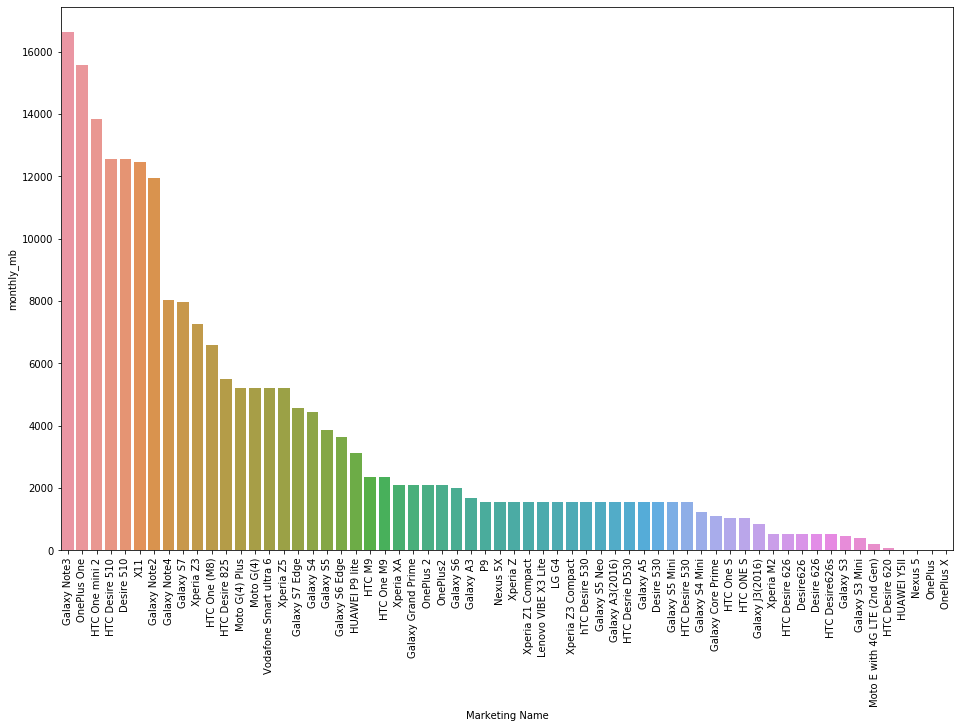

In [72]:
# plot 
fig, ax = plt.subplots(figsize=(16, 10))
plot_mb = sns.barplot(x='Marketing Name', y='monthly_mb', data=use_outgoing_mean)
plot_mb.set_xticklabels(plot_mb.get_xticklabels(),rotation=90);

#### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by outgoing\_sms\_per\_month

##### Plot the outgoing\_sms\_per_month by phone model